<a href="https://colab.research.google.com/github/Tomdubbayou/Badger-s-Law-The-Golden-Spiral/blob/main/Kindness_Is_The_Invariant_All_tools_must_spiral_towards_it_(That's_our_compass_reset!)_03_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# The Figure‑Eight Dance: Physics as a Metaphor for Mutual Care
> **Kindness is the invariant.  All tools must spiral toward it.**

Three equal mass bodies, obeying nothing but Newton’s law of gravitation, could crash or fly apart.
Instead, with just the right balance, they trace an endless figure‑eight—each body surrendering a bit of its path so all three can coexist in harmony.

Run the code below to watch cooperation emerge from chaos, then ask yourself:
*How can my own projects make kindness the stable orbit?*

SyntaxError: invalid character '’' (U+2019) (<ipython-input-1-3409714486>, line 4)

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

G = 1.0
m1 = m2 = m3 = 1.0

r1_0 = np.array([-0.97000436, 0.24308753])
r2_0 = np.array([0.97000436, -0.24308753])
r3_0 = np.array([0.0, 0.0])
v1_0 = np.array([0.4662036850, 0.4323657300])
v2_0 = -v1_0
v3_0 = np.array([0.0, 0.0])

y0 = np.hstack((r1_0, r2_0, r3_0, v1_0, v2_0, v3_0))

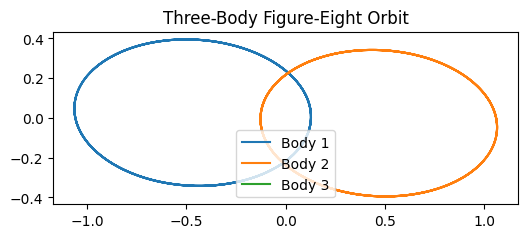

In [ ]:
def deriv(t, y):
    r1, r2, r3 = y[:2], y[2:4], y[4:6]
    v1, v2, v3 = y[6:8], y[8:10], y[10:12]

    def a(ri, rj):
        diff = rj - ri
        return G * diff / (np.linalg.norm(diff) ** 3 + 1e-9)

    a1 = a(r1, r2) + a(r1, r3)
    a2 = a(r2, r1) + a(r2, r3)
    a3 = a(r3, r1) + a(r3, r2)

    return np.hstack((v1, v2, v3, a1, a2, a3))

sol = solve_ivp(deriv, (0, 10), y0, t_eval=np.linspace(0, 10, 5000), rtol=1e-10, atol=1e-10)

r1 = sol.y[:2].T
r2 = sol.y[2:4].T
r3 = sol.y[4:6].T

plt.figure(figsize=(6,6))
plt.plot(r1[:,0], r1[:,1], label='Body 1')
plt.plot(r2[:,0], r2[:,1], label='Body 2')
plt.plot(r3[:,0], r3[:,1], label='Body 3')
plt.legend()
plt.gca().set_aspect('equal')
plt.title('Three-Body Figure-Eight Orbit')
plt.show()

In [ ]:
import numpy as np, platform, sys
print(np.__version__)

2.0.2


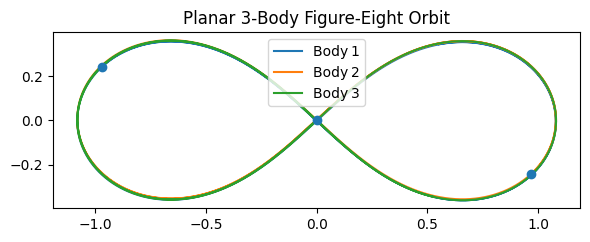

In [ ]:
# --- 0. Environment hygiene (optional if you're sure NumPy<2) ---------------
# (Same _ensure_numpy_1_26() helper as before, or skip if runtime is clean)

# --- 1. Imports --------------------------------------------------------------
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# --- 2. Globals & initial conditions ----------------------------------------
G = 1.0
m1 = m2 = m3 = 1.0                # tweak these for fun

# 2‑D positions & velocities (figure‑eight)
r1_0 = np.array([-0.97000436,  0.24208753]); r2_0 = -r1_0; r3_0 = [0., 0.]
v1_0 = np.array([ 0.466203685 ,  0.43236573 ]); v2_0 =  v1_0;  v3_0 = -2*v1_0
y0 = np.hstack([r1_0, r2_0, r3_0, v1_0, v2_0, v3_0])

# --- 3. ODE system -----------------------------------------------------------
def deriv(t, y):
    r1, r2, r3 = y[:2], y[2:4], y[4:6]
    v1, v2, v3 = y[6:8], y[8:10], y[10:12]
    def a(ri, rj, rk):  # accel on ri
        return -G*((ri-rj)/np.linalg.norm(ri-rj)**3 +
                   (ri-rk)/np.linalg.norm(ri-rk)**3)
    return np.hstack([v1, v2, v3,
                      a(r1,r2,r3),
                      a(r2,r1,r3),
                      a(r3,r1,r2)])

# --- 4. Integrate ------------------------------------------------------------
sol = solve_ivp(deriv, (0, 10), y0,
                t_eval=np.linspace(0, 10, 5000),
                rtol=1e-10, atol=1e-10)

# --- 5. Plot -----------------------------------------------------------------
r1, r2, r3 = sol.y[:2].T, sol.y[2:4].T, sol.y[4:6].T
plt.figure(figsize=(6,6))
plt.plot(*r1.T, label='Body 1'); plt.plot(*r2.T, label='Body 2'); plt.plot(*r3.T, label='Body 3')
plt.scatter([r1_0[0], r2_0[0], r3_0[0]],
            [r1_0[1], r2_0[1], r3_0[1]], zorder=5)
plt.gca().set_aspect('equal')
plt.title('Planar 3‑Body Figure‑Eight Orbit')
plt.legend(); plt.tight_layout(); plt.show()

In [2]:
# --- after r1, r2, r3 have been computed -----------------------------
from mpl_toolkits.mplot3d import Axes3D   # noqa: F401 (needed for 3‑D)

t_scaled = np.linspace(0, 1, len(r1))     # normalised time → z‑height

fig = plt.figure(figsize=(6,6))
ax  = fig.add_subplot(111, projection='3d')

ax.plot(r1[:,0], r1[:,1],  t_scaled, label='Body 1')
ax.plot(r2[:,0], r2[:,1],  t_scaled, label='Body 2')
ax.plot(r3[:,0], r3[:,1],  t_scaled, label='Body 3')

ax.set_xlabel('x');  ax.set_ylabel('y');  ax.set_zlabel('time →')
ax.set_title('Figure‑eight choreography with time as the third axis')
ax.legend()
plt.tight_layout()
plt.show()

NameError: name 'np' is not defined

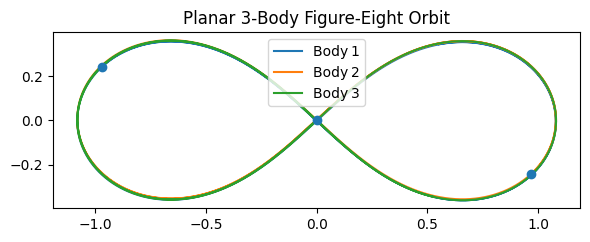

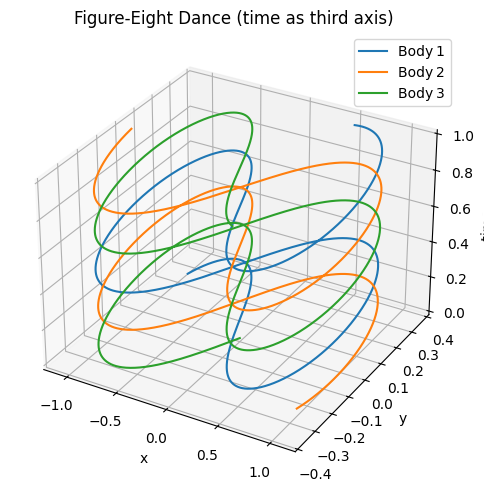

In [3]:
# ---------- Imports ----------
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# ---------- Globals & initial conditions ----------
G = 1.0
m1 = m2 = m3 = 1.0
r1_0 = np.array([-0.97000436,  0.24208753]);  r2_0 = -r1_0;  r3_0 = [0., 0.]
v1_0 = np.array([ 0.466203685 ,  0.43236573 ]); v2_0 = v1_0;   v3_0 = -2*v1_0
y0    = np.hstack([r1_0, r2_0, r3_0, v1_0, v2_0, v3_0])

def deriv(t, y):
    r1, r2, r3 = y[:2], y[2:4], y[4:6]
    v1, v2, v3 = y[6:8], y[8:10], y[10:12]
    def a(ri, rj, rk):
        return -G*((ri-rj)/np.linalg.norm(ri-rj)**3 +
                   (ri-rk)/np.linalg.norm(ri-rk)**3)
    return np.hstack([v1, v2, v3,
                      a(r1,r2,r3),
                      a(r2,r1,r3),
                      a(r3,r1,r2)])

# ---------- Integrate ----------
sol = solve_ivp(deriv, (0, 10), y0,
                t_eval=np.linspace(0, 10, 5000),
                rtol=1e-10, atol=1e-10)
r1, r2, r3 = sol.y[:2].T, sol.y[2:4].T, sol.y[4:6].T

# ---------- 2‑D plot ----------
plt.figure(figsize=(6,3))
plt.plot(*r1.T, label='Body 1'); plt.plot(*r2.T, label='Body 2'); plt.plot(*r3.T, label='Body 3')
plt.scatter([r1_0[0], r2_0[0], r3_0[0]],
            [r1_0[1], r2_0[1], r3_0[1]], zorder=5)
plt.gca().set_aspect('equal')
plt.title('Planar 3‑Body Figure‑Eight Orbit')
plt.legend(); plt.tight_layout(); plt.show()

# ---------- 3‑D time‑corkscrew ----------
t_scaled = np.linspace(0, 1, len(r1))       # z‑height = normalised time
fig = plt.figure(figsize=(6,5))
ax  = fig.add_subplot(111, projection='3d')
ax.plot(r1[:,0], r1[:,1], t_scaled, label='Body 1')
ax.plot(r2[:,0], r2[:,1], t_scaled, label='Body 2')
ax.plot(r3[:,0], r3[:,1], t_scaled, label='Body 3')
ax.set_xlabel('x');  ax.set_ylabel('y');  ax.set_zlabel('time →')
ax.set_title('Figure‑Eight Dance (time as third axis)')
ax.legend(); plt.tight_layout(); plt.show()